In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
df=pd.read_csv('housing_prices.csv')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [112]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [113]:
df.duplicated().sum()

0

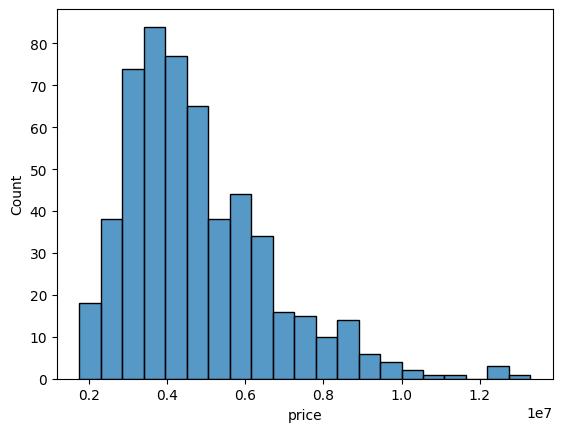

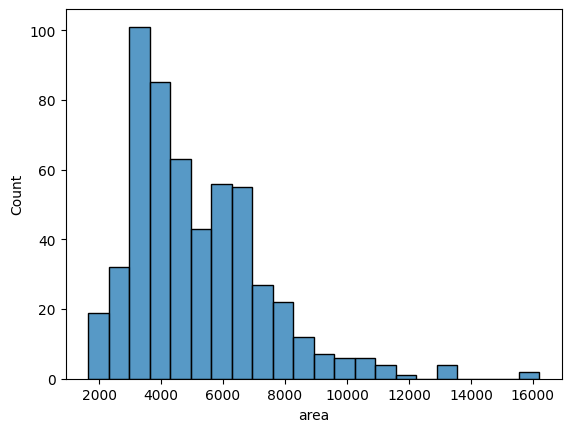

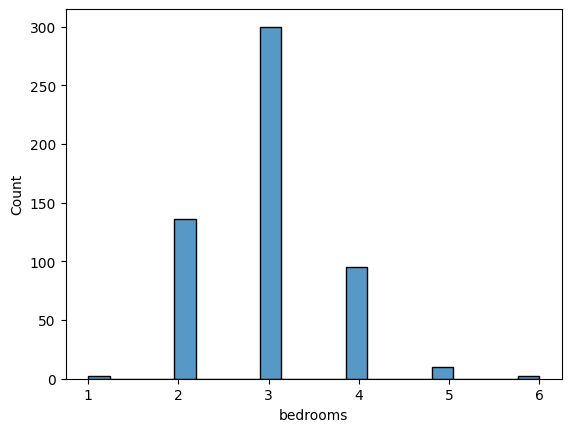

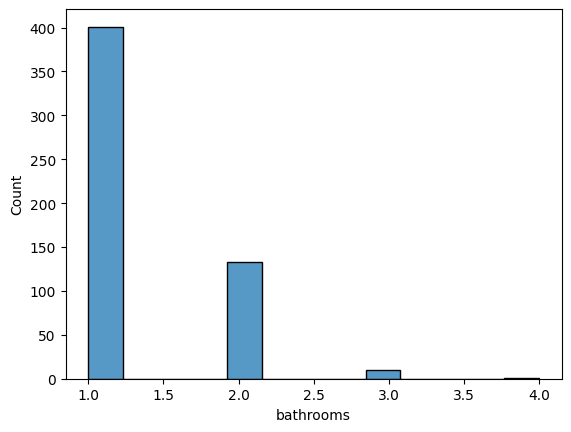

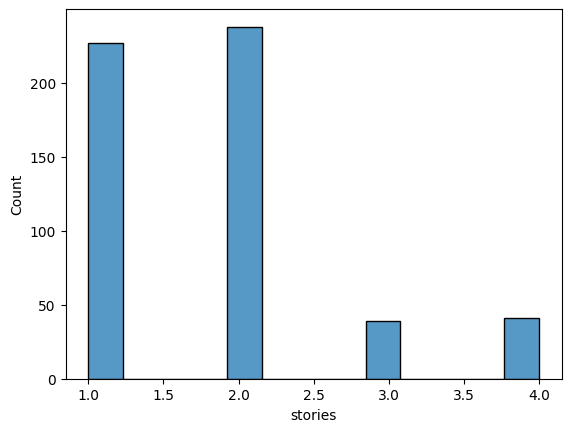

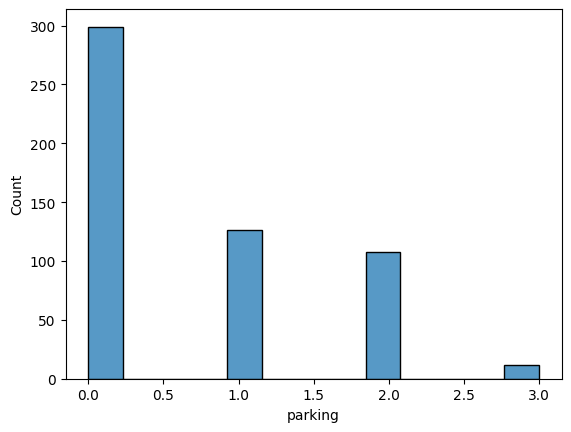

In [114]:
for i in df.select_dtypes(include='number').columns:
	sns.histplot(data=df,x=i)
	plt.show()

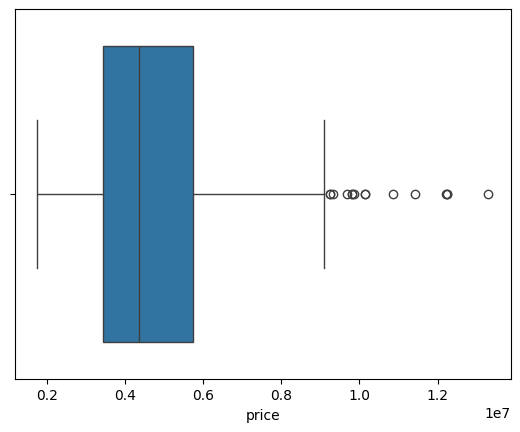

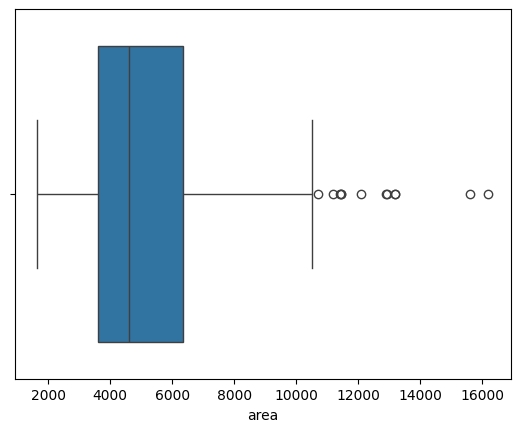

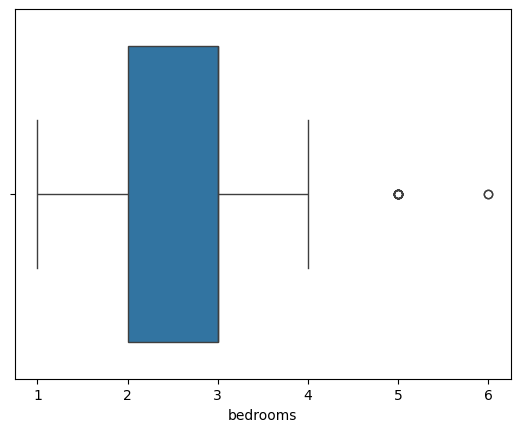

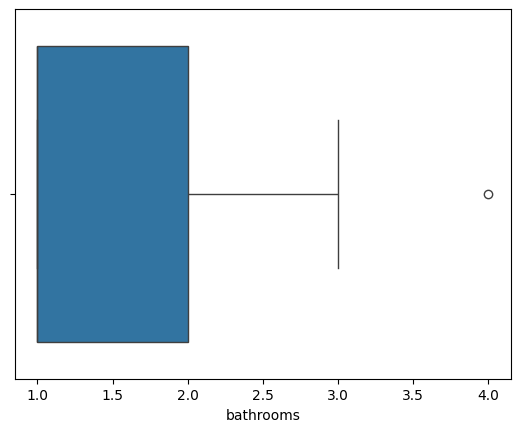

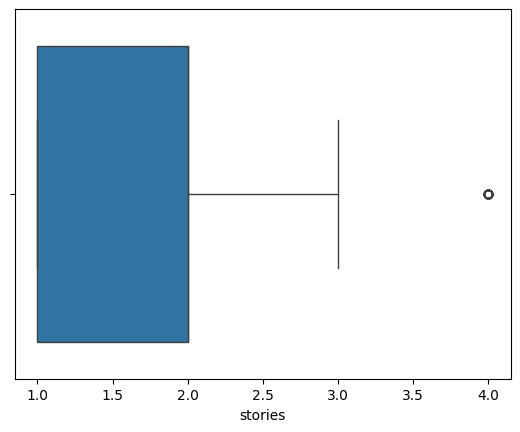

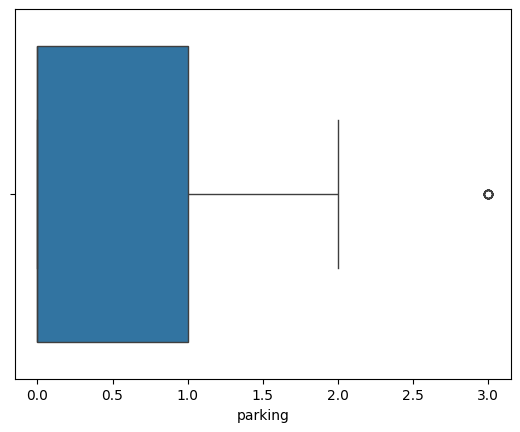

In [115]:
for i in df.select_dtypes(include='number').columns:
	sns.boxplot(data=df,x=i)
	plt.show()


<Axes: >

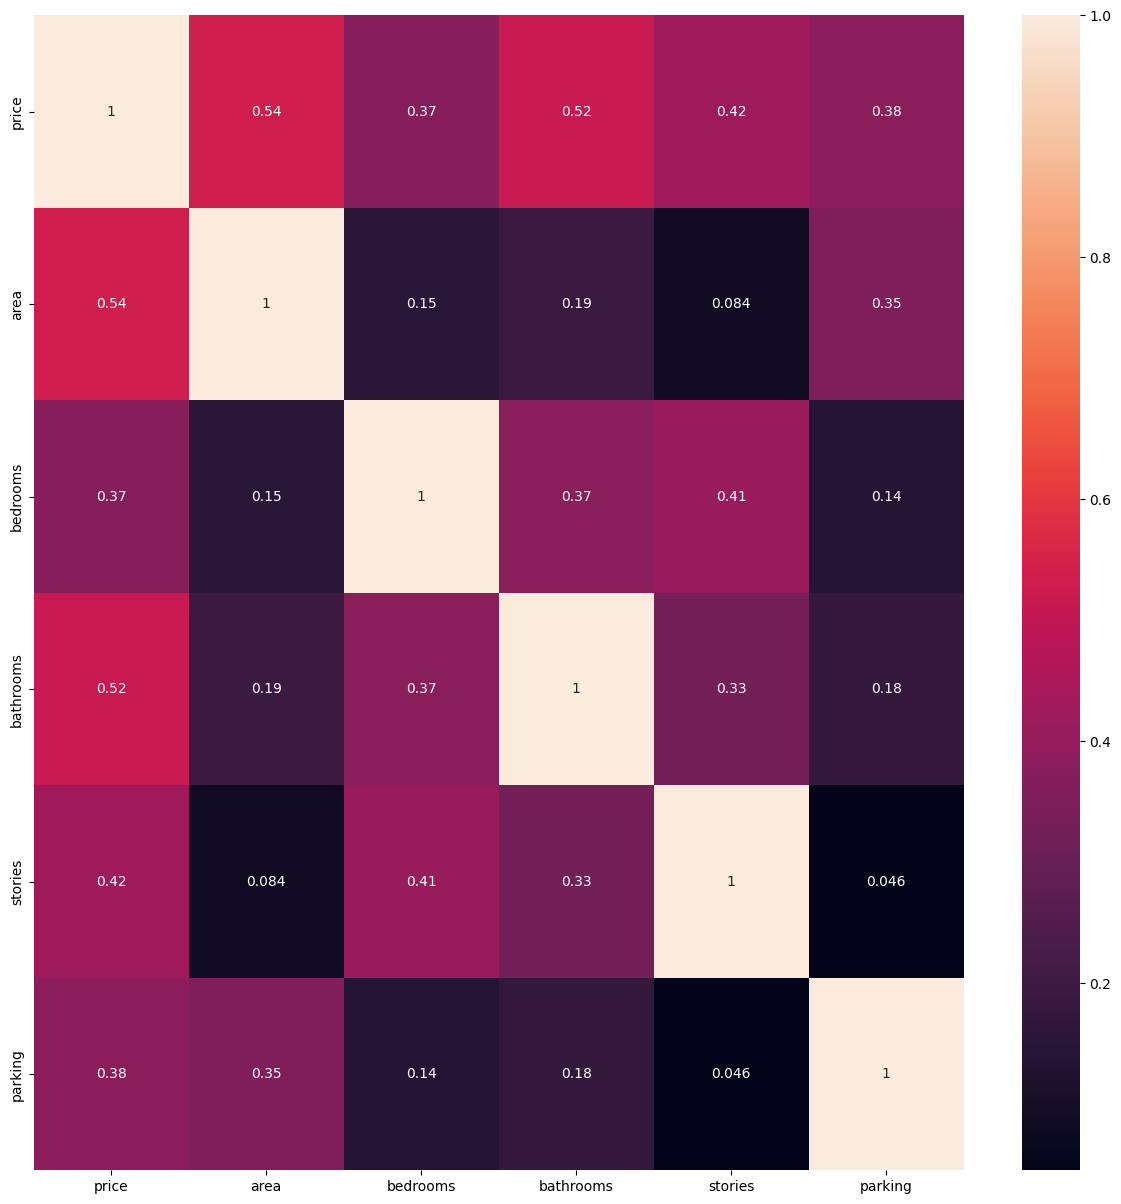

In [116]:
s=df.select_dtypes(include='number').corr()
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [118]:
df['mainroad'].describe()

count     545
unique      2
top       yes
freq      468
Name: mainroad, dtype: object

In [119]:
df['guestroom'].describe()

count     545
unique      2
top        no
freq      448
Name: guestroom, dtype: object

In [120]:
df['hotwaterheating'].describe()

count     545
unique      2
top        no
freq      520
Name: hotwaterheating, dtype: object

In [121]:
df['airconditioning'].describe()

count     545
unique      2
top        no
freq      373
Name: airconditioning, dtype: object

In [122]:
df['prefarea'].describe()

count     545
unique      2
top        no
freq      417
Name: prefarea, dtype: object

In [123]:
df['furnishingstatus'].describe()

count                545
unique                 3
top       semi-furnished
freq                 227
Name: furnishingstatus, dtype: object

In [124]:
from sklearn.preprocessing import LabelEncoder
Scaler=LabelEncoder()
df['mainroad_e']=Scaler.fit_transform(df['mainroad'])
df['guestroom_e']=Scaler.fit_transform(df['guestroom'])
df['hotwaterheating_e']=Scaler.fit_transform(df['hotwaterheating'])
df['airconditioning_e']=Scaler.fit_transform(df['airconditioning'])
df['furnishingstatus_e']=Scaler.fit_transform(df['furnishingstatus'])
df['prefarea_e']=Scaler.fit_transform(df['prefarea'])
df['basement_e']=Scaler.fit_transform(df['basement'])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_e,guestroom_e,hotwaterheating_e,airconditioning_e,furnishingstatus_e,prefarea_e,basement_e
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1,0,0,1,0,1,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1,0,0,1,0,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0,0,0,1,1,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1,0,0,1,0,1,1
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,1,0,1,0,0,1


In [125]:

from sklearn.preprocessing import StandardScaler
Scaler1 = StandardScaler()
df['price_s'] = Scaler1.fit_transform(df[['price']])
df['area_s'] = Scaler1.fit_transform(df[['area']])

In [126]:
df.drop(columns=['mainroad','guestroom','hotwaterheating','airconditioning','furnishingstatus','prefarea','basement','price','area'],inplace=True)
df.head()

,bedrooms,bathrooms,stories,parking,mainroad_e,guestroom_e,hotwaterheating_e,airconditioning_e,furnishingstatus_e,prefarea_e,basement_e,price_s,area_s
0,4,2,3,2,1,0,0,1,0,1,0,4.566365,1.046726
1,4,4,4,3,1,0,0,1,0,0,0,4.004484,1.757010
2,3,2,2,2,1,0,0,0,1,1,1,4.004484,2.218232
3,4,2,2,3,1,0,0,1,0,1,1,3.985755,1.083624
4,4,1,2,2,1,1,0,1,0,0,1,3.554979,1.046726


In [127]:
df.to_csv('housing_prices_new.csv')

<Axes: >

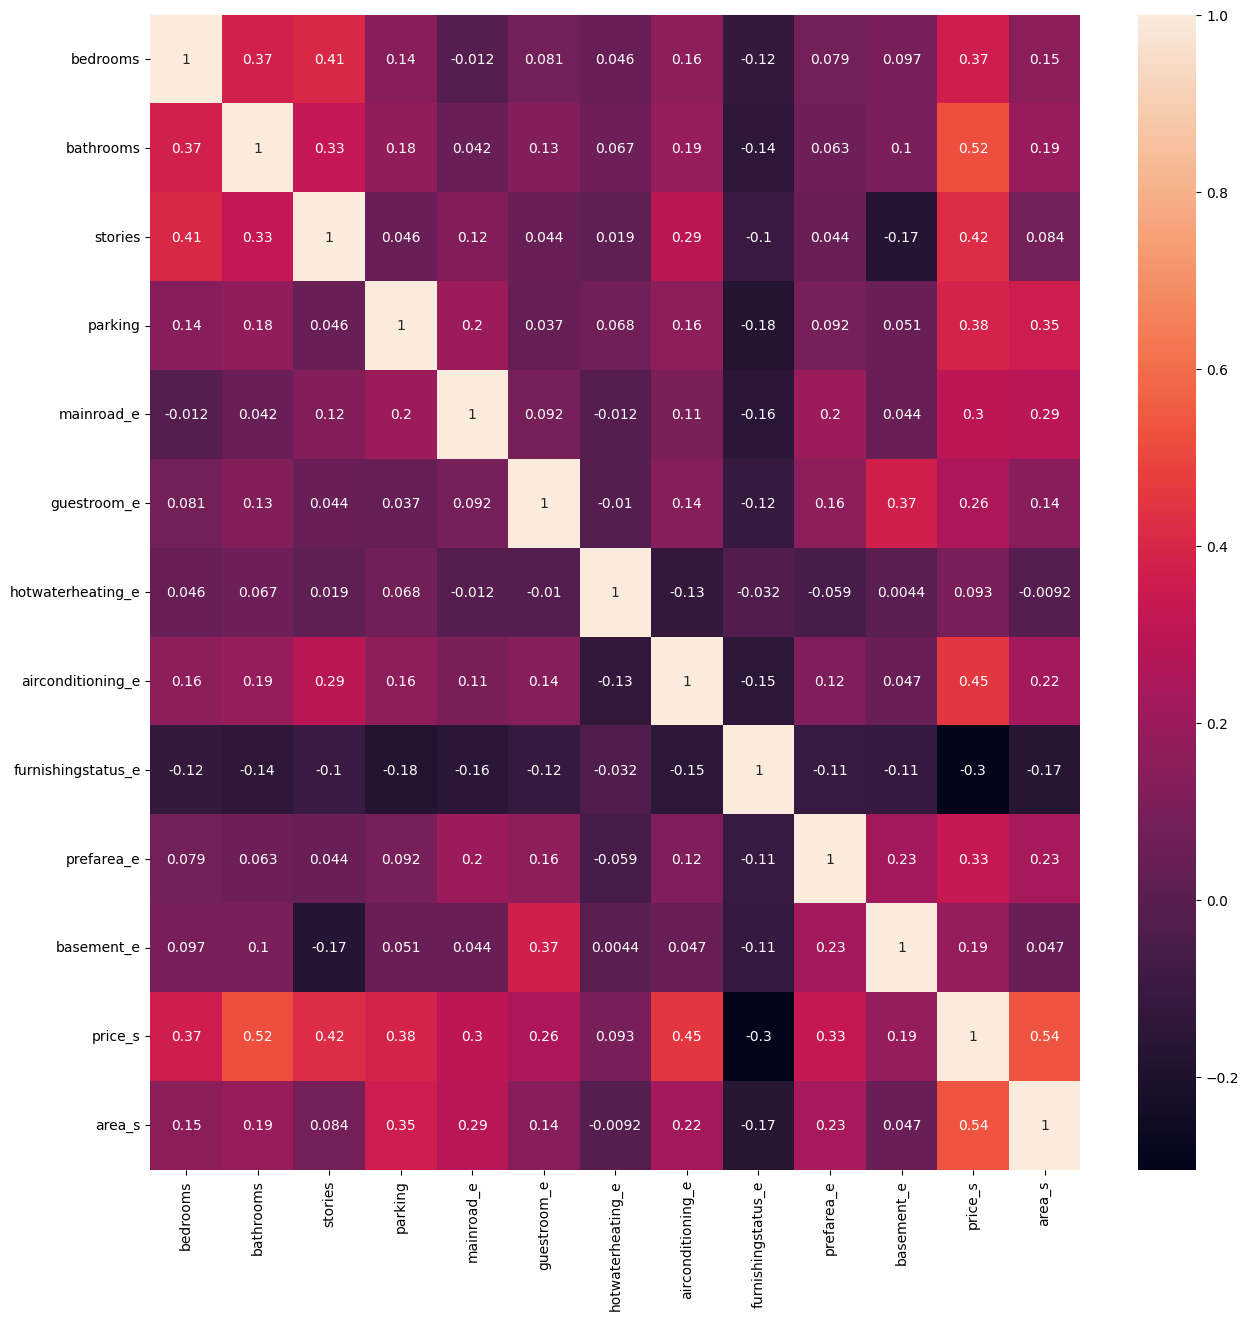

In [128]:
s=df.select_dtypes(include='number').corr()
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)


In [130]:
X=df[['area_s','stories','parking','bedrooms']]
Y=df['price_s']

In [131]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


Linear Regression

In [132]:
Reg=linear_model.LinearRegression()
Reg.fit(X_train,Y_train)
Reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Reg.predict(X_test))
print(f"Mean squared error: {mse}")
rmse = np.sqrt(mse)
print(f"Root mean squared error: {rmse}")
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Reg.predict(X_test))
print(f"R^2 score: {r2}")
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, Reg.predict(X_test))
print(f"Mean absolute error: {mae}")

Mean squared error: 0.7412474018828256
Root mean squared error: 0.8609572590337023
R^2 score: 0.4878835463064358
Mean absolute error: 0.6451945117587491


RandomForestRegressor

In [133]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, Y_train)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Reg.predict(X_test))
print(f"Mean squared error: {mse}")
rmse = np.sqrt(mse)
print(f"Root mean squared error: {rmse}")
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Reg.predict(X_test))
print(f"R^2 score: {r2}")
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, Reg.predict(X_test))
print(f"Mean absolute error: {mae}")


Mean squared error: 0.7412474018828256
Root mean squared error: 0.8609572590337023
R^2 score: 0.4878835463064358
Mean absolute error: 0.6451945117587491


GradientBoostingRegressor

In [134]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, Y_train)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Reg.predict(X_test))
print(f"Mean squared error: {mse}")
rmse = np.sqrt(mse)
print(f"Root mean squared error: {rmse}")
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Reg.predict(X_test))
print(f"R^2 score: {r2}")
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, Reg.predict(X_test))
print(f"Mean absolute error: {mae}")


Mean squared error: 0.7412474018828256
Root mean squared error: 0.8609572590337023
R^2 score: 0.4878835463064358
Mean absolute error: 0.6451945117587491
